In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# figures inline, ignore warnings, setting visualisation style
%matplotlib inline 
import warnings 
warnings.filterwarnings("ignore") 
sns.set()

# algo libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

# evaluation libraries
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# load datasets
data = pd.read_csv("Advertising.csv")

In [3]:
# basic details about data
data.head()

Unnamed: 0     TV  Radio  Newspaper  Sales
0           1   13.7   52.9       74.0   14.4
1           2   62.5   36.8       22.5   23.6
2           3  125.2   23.6       10.6   26.4
3           4   13.6    6.1        0.0    9.6
4           5  204.8    6.6       20.2   21.2

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  180 non-null    int64  
 1   TV          180 non-null    float64
 2   Radio       180 non-null    float64
 3   Newspaper   180 non-null    float64
 4   Sales       180 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.2 KB


In [5]:
# finding null values
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [6]:
# dropping insignificant column
data.drop("Unnamed: 0", axis=1, inplace=True)

In [7]:
data.head()

TV  Radio  Newspaper  Sales
0   13.7   52.9       74.0   14.4
1   62.5   36.8       22.5   23.6
2  125.2   23.6       10.6   26.4
3   13.6    6.1        0.0    9.6
4  204.8    6.6       20.2   21.2

In [8]:
data.describe()

TV       Radio   Newspaper       Sales
count  180.000000  180.000000  180.000000  180.000000
mean   151.638333   26.325556   30.391111   28.043333
std     86.637907   14.727306   21.649334   10.455594
min      5.700000    3.000000   -0.700000    3.200000
25%     77.700000   13.075000   13.275000   20.750000
50%    150.100000   26.450000   24.550000   25.800000
75%    224.925000   38.725000   44.025000   34.800000
max    301.400000   52.900000  113.000000   54.000000

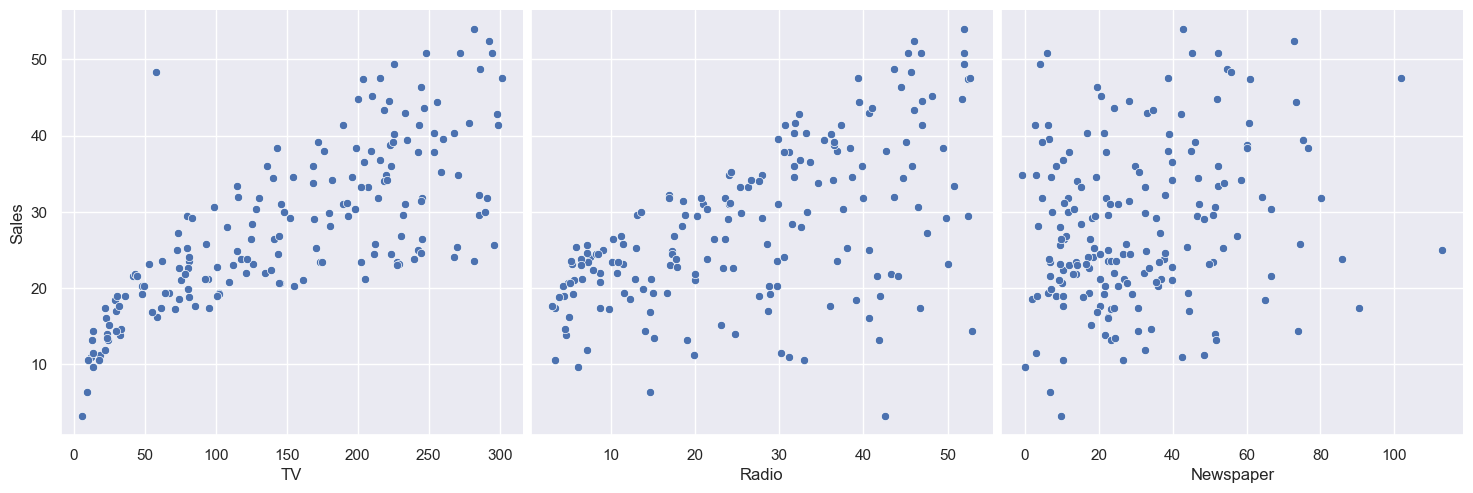

In [9]:
# data visualisation, checking correlation features with sales
sns.pairplot(data = data, y_vars = "Sales", x_vars = ["TV", "Radio", "Newspaper"], size = 5)

<Axes: >

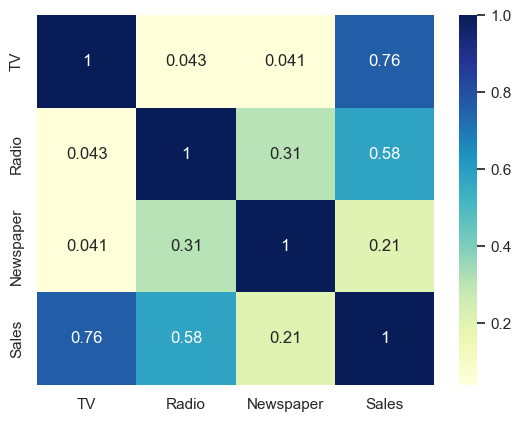

In [10]:
# correlation heatmap
sns.heatmap(data.corr(), annot = True, cmap = "YlGnBu")

In [11]:
# separating out target variable
X = data.drop("Sales", axis = 1)
y = data["Sales"]

In [12]:
X.head()

TV  Radio  Newspaper
0   13.7   52.9       74.0
1   62.5   36.8       22.5
2  125.2   23.6       10.6
3   13.6    6.1        0.0
4  204.8    6.6       20.2

In [13]:
y.head()

0    14.4
1    23.6
2    26.4
3     9.6
4    21.2
Name: Sales, dtype: float64

In [14]:
# standardisation
cols = X.columns
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=cols)

In [15]:
# independent variables standardised
X.head()

TV     Radio  Newspaper
0 -1.596566  1.809467   2.019948
1 -1.031731  0.713210  -0.365513
2 -0.306010 -0.185584  -0.916717
3 -1.597723 -1.377168  -1.407705
4  0.615319 -1.343123  -0.472049

In [16]:
# splitting into training and validation dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [17]:
# applying linear regression algorithm
LR = LinearRegression()
LR.fit(X_train, y_train)
print(LR.intercept_)
print(LR.coef_)

28.063175449032382
[7.56246498 5.4476685  0.11601492]


In [18]:
# R-square and Adjusted R-square
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)
R2_train = r2_score(y_train_pred, y_train)
R2_test = r2_score(y_test, y_test_pred)
print(f'R_square = Train = {R2_train}, Test = {R2_test}')
Adj_R2_train = 1-(1-R2_train)*(X_train.shape[0]-1)/(X_train.shape[0]-3-1)
Adj_R2_test = 1-(1-R2_train)*(X_test.shape[0]-1)/(X_test.shape[0]-3-1)
print(f'Adjusted_R_square = Train = {Adj_R2_train}, Test = {Adj_R2_test}')

R_square = Train = 0.8347092163075186, Test = 0.911786311398567
Adjusted_R_square = Train = 0.8311672709426797, Test = 0.8192132053363484


In [19]:
# cross validation with random shuffling
kf=KFold(5, shuffle=True, random_state=9) #for shuffling
cross_val_results=cross_val_score(LR,X_train, y_train,cv=kf)
print(cross_val_results)
print(cross_val_results.mean())

[0.77636686 0.79519956 0.89215368 0.77587899 0.92592793]
0.8331054048850467


In [20]:
# checking variance_inflation_factor
vif = []
for i in range(X.shape[1]):
    vif.append(variance_inflation_factor(X,i))
pd.DataFrame({'VIF':vif},index = X.columns)

VIF
TV         1.002715
Radio      1.105553
Newspaper  1.105339

In [21]:
# predictions and adding predictions to original dataframe
sales_predict = LR.predict(X)
pred_sales = pd.DataFrame(sales_predict, columns=['predicted_sales'])
data_pred = pd.concat([data, pred_sales], axis=1)

In [22]:
# checking relation between original sales and predicted sales
data_pred

TV  Radio  Newspaper  Sales  predicted_sales
0     13.7   52.9       74.0   14.4        26.080924
1     62.5   36.8       22.5   23.6        24.103676
2    125.2   23.6       10.6   26.4        24.631629
3     13.6    6.1        0.0    9.6         8.314782
4    204.8    6.6       20.2   21.2        25.344853
..     ...    ...        ...    ...              ...
175   44.5   44.1        6.8   21.6        25.151559
176   80.5   13.8        7.0   19.8        17.064461
177   22.2    7.1       32.6   11.8         9.613673
178  171.8   45.0        4.6   39.2        36.616358
179  154.7   38.6        7.0   34.6        32.758483

[180 rows x 5 columns]

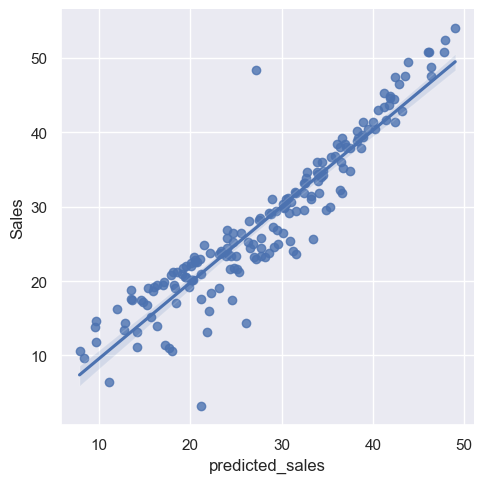

In [23]:
# graph visualisation between original sales and predicted sales
sns.lmplot(data = data_pred, y= "Sales", x= "predicted_sales")

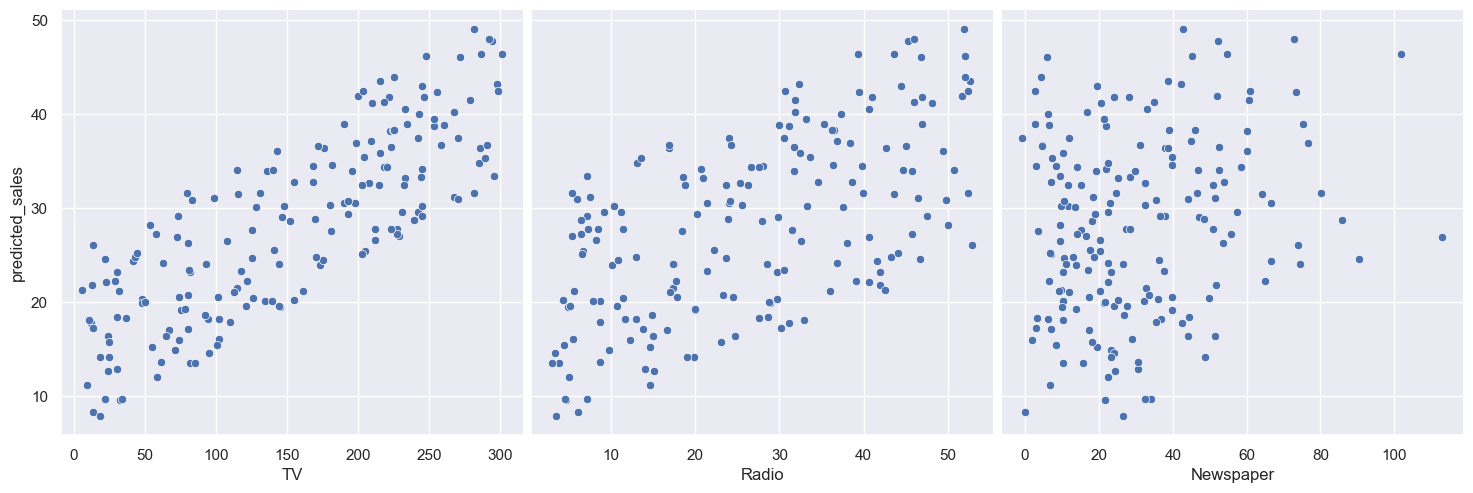

In [24]:
# graph visualisation between predicted sales and independent variables
sns.pairplot(data = data_pred, y_vars = "predicted_sales", x_vars = ["TV", "Radio", "Newspaper"], size = 5)

Text(0, 0.5, 'freq')

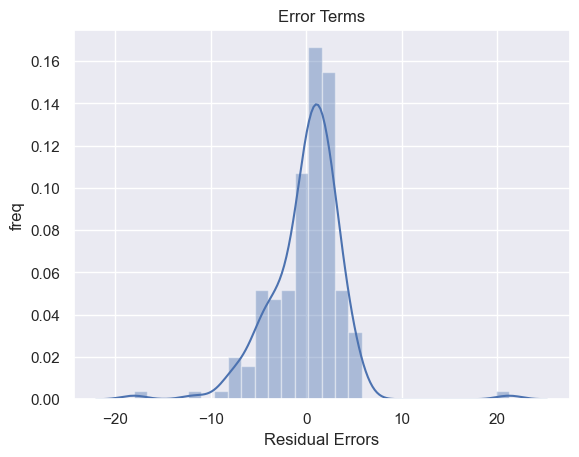

In [25]:
# distribution of residual errors
residuals = (data_pred["Sales"] - data_pred["predicted_sales"])
sns.distplot(residuals)
plt.title('Error Terms')
plt.xlabel('Residual Errors')
plt.ylabel('freq')

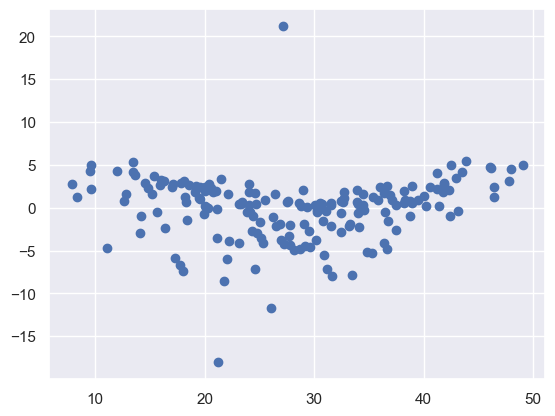

In [26]:
# scattering of residual errors with predicted sales
plt.scatter(data_pred["predicted_sales"], residuals)

In [27]:
# regularisation with Lasso(L1) and Ridge(L2) cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]).fit(X_train, y_train)
ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]).fit(X_train, y_train)

In [28]:
print("The train score for linear model is {}".format(LR.score(X_train, y_train)))
print("The test score for linear model is {}".format(LR.score(X_test, y_test)))
print("The train score for lasso model is {}".format(lasso_cv.score(X_train, y_train)))
print("The test score for lasso model is {}".format(lasso_cv.score(X_test, y_test)))
print("The train score for ridge model is {}".format(ridge_cv.score(X_train, y_train)))
print("The test score for ridge model is {}".format(ridge_cv.score(X_test, y_test)))

The train score for linear model is 0.8581549034750613
The test score for linear model is 0.911786311398567
The train score for lasso model is 0.8578992068523819
The test score for lasso model is 0.9088618518850817
The train score for ridge model is 0.8581545037987502
The test score for ridge model is 0.9116696450193851
